## **Project Overview**

The primary objective of this project is to assist the bakery company in increasing sales and customer base by leveraging association rule mining. 

We aim to identify relationships between items within dataset found [here](https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket/data), which originates, according to the source, from a bakery in Edinburgh. Our goal is to uncover which products are frequently purchased together, quantify the strength of these co-occurrences, and provide strategic recommendations based on our findings.

This analysis draws inspiration from the article [*"A Conceptual Introduction into Association Rule Mining — Part 2"*](https://medium.com/delvify/a-conceptual-introduction-into-association-rule-mining-part-2-96c73c4ce87b) authored by Annette Catherine Paul, published on August 13, 2021. My goal is to re-create and adapt her analysis, but with my own unique approach. I am driven by a curiosity to explore the outcomes and a desire to verify the accuracy of her conclusions. I respect her methodological process and see this project as a valuable opportunity to enhance my understanding, as she has extensive experience in the field.

*“Imitation is not mechanical ‘parroting’, but complex, goal-oriented behavior which is central to learning” (Purainen-Marsh et al.2012)*

### Main scope of work
* [1. Data understanding & data wrangling](#Step1)
* [2. Transactions encoding](#Step2)
* [3. Tree map](#Step3)
* [4. Apriori algorithm - frequent itemsets generation](#Step4)
* [5. Association rules](#Step5)
* [6. Visualizations for rules generated with support threshold 0.01](#Step6)
* [7. Final conclusions and recommendations](#Step7)

## **Modules**

In [5]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

import squarify
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import style 
import seaborn as sns 
sns. set()

from PyARMViz import PyARMViz
from PyARMViz.Rule import generate_rule_from_dict

## **1. Data understanding and data wrangling** <a id="Step1"></a>

In [7]:
data_bakery = pd.read_csv('bread basket.csv')
data_bakery

Transaction           Item         date_time period_day weekday_weekend
0                1          Bread  30-10-2016 09:58    morning         weekend
1                2   Scandinavian  30-10-2016 10:05    morning         weekend
2                2   Scandinavian  30-10-2016 10:05    morning         weekend
3                3  Hot chocolate  30-10-2016 10:07    morning         weekend
4                3            Jam  30-10-2016 10:07    morning         weekend
...            ...            ...               ...        ...             ...
20502         9682         Coffee  09-04-2017 14:32  afternoon         weekend
20503         9682            Tea  09-04-2017 14:32  afternoon         weekend
20504         9683         Coffee  09-04-2017 14:57  afternoon         weekend
20505         9683         Pastry  09-04-2017 14:57  afternoon         weekend
20506         9684      Smoothies  09-04-2017 15:04  afternoon         weekend

[20507 rows x 5 columns]

In [8]:
data_bakery.columns = ['Transaction', 'Item', 'Date_time', 'Period_day', 'Weekday_weekend']

### **Data types & Missing values**

In [10]:
data_bakery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   Date_time        20507 non-null  object
 3   Period_day       20507 non-null  object
 4   Weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


No missing values

In [12]:
data_bakery['Date_time'] = pd.to_datetime(data_bakery['Date_time'], dayfirst=True)

In [13]:
#data_bakery.isnull().sum()

### **Transactions**

In [15]:
data_bakery['Transaction'].nunique()

9465

In [16]:
data_unique_trans = data_bakery.drop_duplicates(subset='Transaction')
data_unique_trans.reset_index(drop=True)

Transaction           Item           Date_time Period_day  \
0               1          Bread 2016-10-30 09:58:00    morning   
1               2   Scandinavian 2016-10-30 10:05:00    morning   
2               3  Hot chocolate 2016-10-30 10:07:00    morning   
3               4         Muffin 2016-10-30 10:08:00    morning   
4               5         Coffee 2016-10-30 10:13:00    morning   
...           ...            ...                 ...        ...   
9460         9680          Bread 2017-04-09 14:24:00  afternoon   
9461         9681       Truffles 2017-04-09 14:30:00  afternoon   
9462         9682         Muffin 2017-04-09 14:32:00  afternoon   
9463         9683         Coffee 2017-04-09 14:57:00  afternoon   
9464         9684      Smoothies 2017-04-09 15:04:00  afternoon   

     Weekday_weekend  
0            weekend  
1            weekend  
2            weekend  
3            weekend  
4            weekend  
...              ...  
9460         weekend  
9461         weekend  
9462         weekend  
9463         weekend  
9464         weekend  

[9465 rows x 5 columns]

A total of 9465 transactions were carried out.

### **Items**

In [19]:
data_bakery['Item'].nunique()

94

In [20]:
sorted(data_bakery['Item'].unique())

['Adjustment',
 'Afternoon with the baker',
 'Alfajores',
 'Argentina Night',
 'Art Tray',
 'Bacon',
 'Baguette',
 'Bakewell',
 'Bare Popcorn',
 'Basket',
 'Bowl Nic Pitt',
 'Bread',
 'Bread Pudding',
 'Brioche and salami',
 'Brownie',
 'Cake',
 'Caramel bites',
 'Cherry me Dried fruit',
 'Chicken Stew',
 'Chicken sand',
 'Chimichurri Oil',
 'Chocolates',
 'Christmas common',
 'Coffee',
 'Coffee granules ',
 'Coke',
 'Cookies',
 'Crepes',
 'Crisps',
 'Drinking chocolate spoons ',
 'Duck egg',
 'Dulce de Leche',
 'Eggs',
 "Ella's Kitchen Pouches",
 'Empanadas',
 'Extra Salami or Feta',
 'Fairy Doors',
 'Farm House',
 'Focaccia',
 'Frittata',
 'Fudge',
 'Gift voucher',
 'Gingerbread syrup',
 'Granola',
 'Hack the stack',
 'Half slice Monster ',
 'Hearty & Seasonal',
 'Honey',
 'Hot chocolate',
 'Jam',
 'Jammie Dodgers',
 'Juice',
 'Keeping It Local',
 'Kids biscuit',
 'Lemon and coconut',
 'Medialuna',
 'Mighty Protein',
 'Mineral water',
 'Mortimer',
 'Muesli',
 'Muffin',
 'My-5 Fruit S

Insights: 
- There are no spelling mistakes, no typos, 
- The shop provides a well-rounded selection of products

* Bakery items: various breads, cakes, pastries, and cookies
* Confectionery: from chocolates and fudges to sweet snacks like popcorn and crisps
* Savory meals, snacks and conidments: chicken stew, frittata, polenta, focaccia, tacos
* Beverages:  both hot drinks like coffee and tea and cold options like juices and flavored water
* Specialty and seasonal items: the shop offers products tailored to specific events (Christmas common, Valentine’s card) or dietary preferences, such as vegan options.
* Gifts & extras: fift voucher, postcard, nomad bag, t-shirt, afternoon with the baker
* And many more...                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [22]:
data_bakery['Item'].value_counts()

Item
Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: count, Length: 94, dtype: int64

#### Network diagram 
The 30 most frequently purchased products across all transactions 

In [24]:
top_items = data_bakery['Item'].value_counts().nlargest(30)
top_items

Item
Coffee               5471
Bread                3325
Tea                  1435
Cake                 1025
Pastry                856
Sandwich              771
Medialuna             616
Hot chocolate         590
Cookies               540
Brownie               379
Farm House            374
Muffin                370
Alfajores             369
Juice                 369
Soup                  342
Scone                 327
Toast                 318
Scandinavian          277
Truffles              193
Coke                  185
Spanish Brunch        172
Fudge                 159
Baguette              152
Jam                   149
Tiffin                146
Mineral water         136
Jammie Dodgers        125
Chicken Stew          123
Hearty & Seasonal     107
Salad                  99
Name: count, dtype: int64

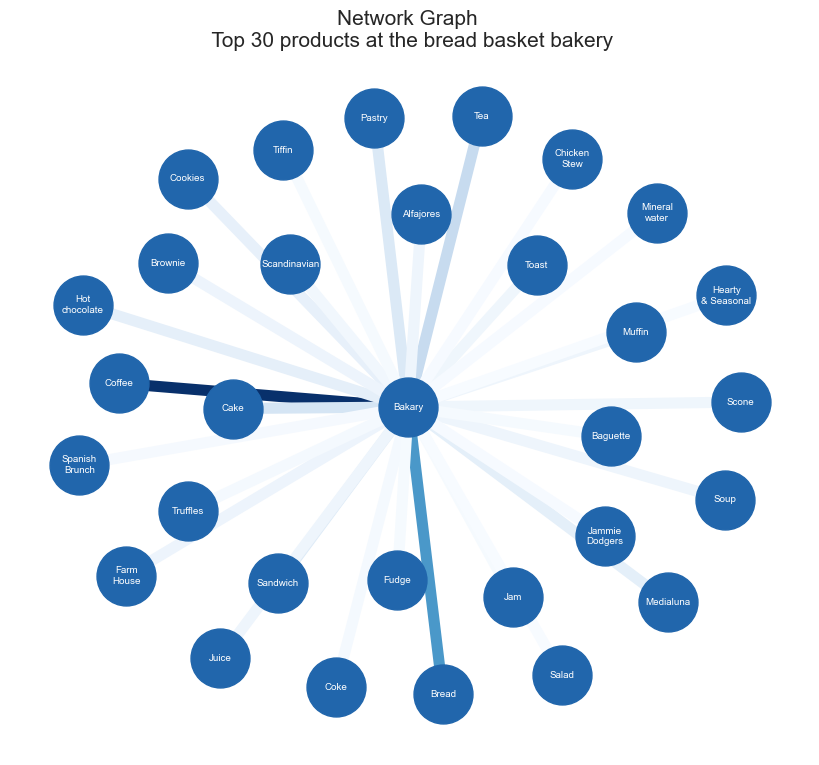

In [25]:
df = pd.DataFrame({
    'from': ['Bakary'] * len(top_items),
    'to': top_items.index,
    'value': top_items.values
})

# Build the graph
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph())

# Function to format labels
def format_label(label):
    if ' ' in label:
        # Split label into two lines at the space
        return '\n'.join(label.split(' ', 1))
    else:
        # Return label as is
        return label

# Prepare labels with formatting
formatted_labels = {node: format_label(node) for node in G.nodes()}

# Draw the graph
plt.figure(figsize=(8, 7))

nx.draw(
    G,
    with_labels=True,                           # Show labels
    node_color='#2166ac',                       # Dark red color for nodes
    node_size=1800,                             # Size of the nodes
    edge_color=df['value'],                     # Set edge color
    width=8.0,                                 # Edge width
    labels=formatted_labels,                    # Use formatted labels
    font_color='white',                         # Set the label color to white
    font_size=7,                                # Set the label size
    edge_cmap=plt.cm.Blues                      # Edge color map 
)

plt.title("Network Graph \n Top 30 products at the bread basket bakery", fontsize=15);

Network graph was built based on [this code](https://python-graph-gallery.com/325-map-colour-to-the-edges-of-a-network/). 

The visibility of the line indicates the strength of the connection, meaning the more visible the line, the more frequently the product appears. 

**Among 94 available items, products purchased most frequently (represented by the most visible lines) are <u>coffee, bread, tea, and cake</u>**. 

### **Date_time**

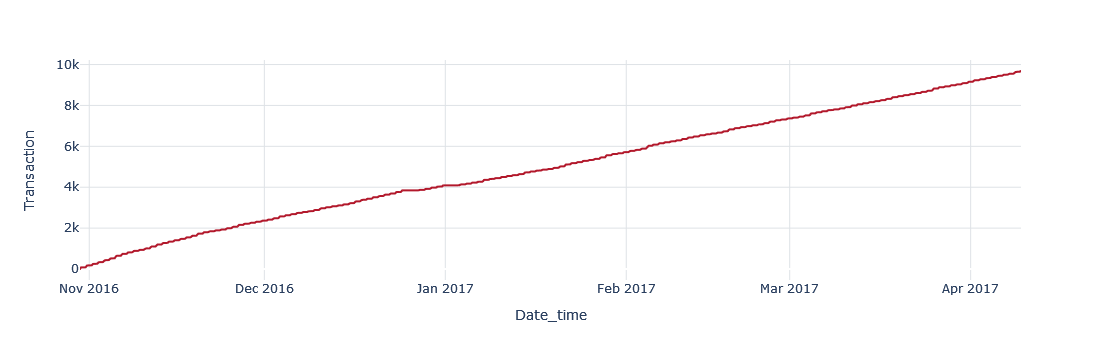

In [28]:
import plotly.express as px
fig = px.line(data_unique_trans, x = 'Date_time', y ='Transaction' )
fig.update_traces(line=dict(color='#B2182B', width=2))  

fig.update_layout(
    plot_bgcolor='white', 
    xaxis=dict(showgrid=True, gridcolor='#dee2e6'),  
    yaxis=dict(showgrid=True, gridcolor='#dee2e6')
)

fig

In [29]:
data_bakery['Date_time'].sort_values(ascending = False)

20506   2017-04-09 15:04:00
20505   2017-04-09 14:57:00
20504   2017-04-09 14:57:00
20503   2017-04-09 14:32:00
20502   2017-04-09 14:32:00
                ...        
3       2016-10-30 10:07:00
5       2016-10-30 10:07:00
2       2016-10-30 10:05:00
1       2016-10-30 10:05:00
0       2016-10-30 09:58:00
Name: Date_time, Length: 20507, dtype: datetime64[ns]

In [30]:
2000/30

66.66666666666667

Every month, around 2000 transactions were conducted (it is around 67 transactions per day), indicating that the transactions are evenly distributed across the months.

The dataset encompasses transactions from last days of October 2016 (starting from 30/10/2026) to the first days of April 2017 (up to 09/04/2027).This means **we have data covering approximately 5/6 months (roughly half of the year)**.

### **Period_day** 	

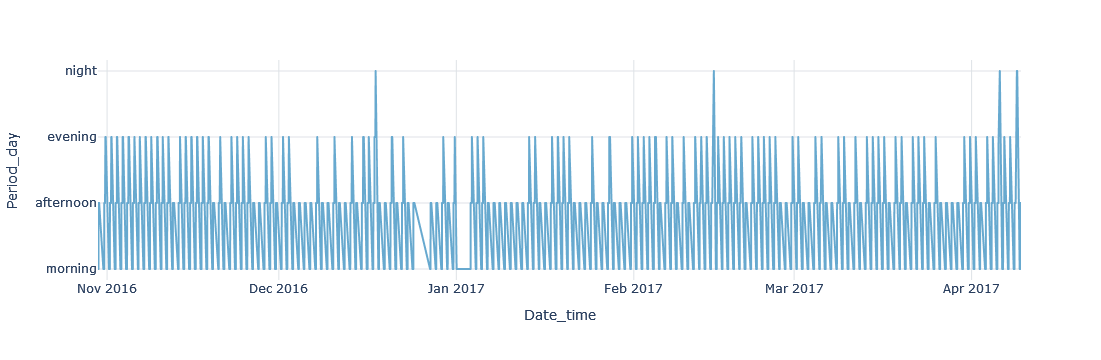

In [33]:
fig = px.line(data_unique_trans, x = 'Date_time', y ='Period_day' )
fig.update_traces(line=dict(color='#67a9cf', width=2))  

fig.update_layout(
    plot_bgcolor='white', 
    xaxis=dict(showgrid=True, gridcolor='#dee2e6'),  
    yaxis=dict(showgrid=True, gridcolor='#dee2e6')
)

fig

In [34]:
round((data_unique_trans['Period_day'].value_counts() / data_unique_trans.shape[0]) * 100,2)

Period_day
afternoon    53.77
morning      43.35
evening       2.76
night         0.13
Name: count, dtype: float64

In [35]:
53.77 + 43.35

97.12

Around 97% of transactions were conducted in the afternoon or morning, while evening and night are less popular.

The next question is: what exactly does each period of the day mean and what are the hour ranges for each?

In [37]:
#data_unique_trans[data_unique_trans['Period_day'] == 'afternoon']

In [38]:
data_unique_trans[data_unique_trans['Period_day'] == 'morning']['Date_time'].dt.strftime('%H:%M').sort_values()

8144     01:21
3716     07:29
872      07:32
2644     07:39
2792     07:42
         ...  
14321    11:59
6658     11:59
13771    11:59
7563     11:59
20467    11:59
Name: Date_time, Length: 4103, dtype: object

From the earliest classified transaction to the latest 
* morning: 01:21, next transaction 7:29 - 11:59
* afternoon: 12:00 - 16:59 
* evening: 17:00 - 20:46
* night: 21:42 - 23:38

Insights: 

The observed operating hours appear to be from 7:30 AM to 12:00 PM (There is just one transaction that is beyond the schedule - 01:21AM)
Also some transactions occurred very late, which is quite unusual for a bakery.  

Maybe the shop is open 24/7 or maybe some of the transactions were made online? 

### **Weekday_weekend**

In [41]:
round((data_unique_trans['Weekday_weekend'].value_counts() / data_unique_trans.shape[0]) * 100,2)

Weekday_weekend
weekday    64.92
weekend    35.08
Name: count, dtype: float64

65% of transactions occurred on weekdays, while 35% on weekends. 

In [43]:
round((data_unique_trans['Date_time'].dt.day_name().value_counts() / data_unique_trans.shape[0]) * 100,2)

Date_time
Saturday     21.75
Friday       15.58
Sunday       13.32
Thursday     13.19
Tuesday      12.52
Monday       11.92
Wednesday    11.72
Name: count, dtype: float64

The most transactions were conducted on Saturdays, which makes sense as this is a free day for many people, giving them more time for shopping. The shop is open every day of the week, whether it's a weekend or a weekday. However, it is likely closed on bank holidays, but this would need to be confirmed.

In [45]:
data_unique_trans[data_unique_trans['Date_time'].dt.day_name() == 'Friday']

Transaction          Item           Date_time Period_day  \
872            437     Medialuna 2016-11-04 07:32:00    morning   
873            438         Bread 2016-11-04 08:34:00    morning   
876            439    Farm House 2016-11-04 08:36:00    morning   
877            440         Bread 2016-11-04 08:40:00    morning   
878            441        Coffee 2016-11-04 08:45:00    morning   
...            ...           ...                 ...        ...   
20224         9546        Coffee 2017-04-07 15:56:00  afternoon   
20226         9547          Coke 2017-04-07 16:09:00  afternoon   
20227         9548        Coffee 2017-04-07 16:29:00  afternoon   
20230         9549         Bread 2017-04-07 16:37:00  afternoon   
20231         9550  Chicken Stew 2017-04-07 17:30:00    evening   

      Weekday_weekend  
872           weekday  
873           weekday  
876           weekday  
877           weekday  
878           weekday  
...               ...  
20224         weekday  
20226         weekday  
20227         weekday  
20230         weekday  
20231         weekday  

[1475 rows x 5 columns]

Friday is treated as a weekday.

In [47]:
transactions_weekend = data_unique_trans[data_unique_trans['Weekday_weekend'] =='weekend'].reset_index(drop = True)
transactions_weekday = data_unique_trans[data_unique_trans['Weekday_weekend'] =='weekday'].reset_index(drop = True)

In [48]:
transactions_weekend['Date_time'].dt.strftime('%H:%M').sort_values()

1299    01:21
1873    07:56
2337    08:04
1162    08:05
1163    08:06
        ...  
3283    22:45
3284    22:47
3285    22:48
3286    22:56
3287    23:20
Name: Date_time, Length: 3320, dtype: object

In [49]:
transactions_weekday['Date_time'].dt.strftime('%H:%M').sort_values()

1142    07:29
351     07:32
795     07:39
860     07:42
1402    07:44
        ...  
2103    20:11
3593    20:20
6047    22:15
4236    23:29
4237    23:38
Name: Date_time, Length: 6145, dtype: object

The opening hours are similar for both weekends and weekdays.

### **Bank holidays**

List of fixed bank holidays in Scotland according to [wikipedia](https://en.wikipedia.org/wiki/Public_and_bank_holidays_in_Scotland) that could be included in our dataset is presented in dictionary bank_holidays.

In [53]:
bank_holidays = [
    '2016-11-30',  # St. Andrew's Day
    '2016-12-25',  # Christmas Day
    '2016-12-26',  # Boxing Day
    '2017-01-01',  # New Year's Day
    '2017-01-02',  # 2nd January
]

#bank_holidays += ['2016-03-25', '2017-04-14']  # Good Friday for 2016 and 2017
bank_holidays = pd.to_datetime(bank_holidays)

In [54]:
bank_holiday_transactions = data_unique_trans[data_unique_trans['Date_time'].dt.date.isin(bank_holidays.date)]
bank_holiday_transactions.reset_index(drop=True)

Transaction              Item           Date_time Period_day  \
0          2315             Bread 2016-11-30 08:09:00    morning   
1          2316         Medialuna 2016-11-30 08:29:00    morning   
2          2317              Cake 2016-11-30 08:36:00    morning   
3          2318             Bread 2016-11-30 08:36:00    morning   
4          2319        Farm House 2016-11-30 09:47:00    morning   
5          2320         Medialuna 2016-11-30 10:19:00    morning   
6          2321  Keeping It Local 2016-11-30 10:41:00    morning   
7          2322            Coffee 2016-11-30 10:47:00    morning   
8          2323            Coffee 2016-11-30 10:53:00    morning   
9          2324         Smoothies 2016-11-30 11:04:00    morning   
10         2325            Coffee 2016-11-30 11:05:00    morning   
11         2326            Coffee 2016-11-30 11:06:00    morning   
12         2327        Farm House 2016-11-30 11:06:00    morning   
13         2328               Tea 2016-11-30 11:09:00    morning   
14         2329             Bread 2016-11-30 11:14:00    morning   
15         2330            Pastry 2016-11-30 11:17:00    morning   
16         2331            Coffee 2016-11-30 11:18:00    morning   
17         2332            Coffee 2016-11-30 11:21:00    morning   
18         2333            Coffee 2016-11-30 11:21:00    morning   
19         2334             Bread 2016-11-30 11:29:00    morning   
20         2335             Bread 2016-11-30 11:37:00    morning   
21         2337            Coffee 2016-11-30 11:38:00    morning   
22         2338             Bread 2016-11-30 11:48:00    morning   
23         2339  Keeping It Local 2016-11-30 11:56:00    morning   
24         2340               Tea 2016-11-30 12:08:00  afternoon   
25         2341            Coffee 2016-11-30 12:12:00  afternoon   
26         2342            Coffee 2016-11-30 12:17:00  afternoon   
27         2343             Bread 2016-11-30 12:26:00  afternoon   
28         2344            Muffin 2016-11-30 12:29:00  afternoon   
29         2346            Coffee 2016-11-30 12:41:00  afternoon   
30         2347            Coffee 2016-11-30 13:29:00  afternoon   
31         2348             Bread 2016-11-30 13:31:00  afternoon   
32         2350             Bread 2016-11-30 13:50:00  afternoon   
33         2351               Tea 2016-11-30 14:10:00  afternoon   
34         2352     Hot chocolate 2016-11-30 14:33:00  afternoon   
35         2353               Tea 2016-11-30 14:37:00  afternoon   
36         2354            Muffin 2016-11-30 14:50:00  afternoon   
37         2355          Sandwich 2016-11-30 15:15:00  afternoon   
38         2356          Sandwich 2016-11-30 15:16:00  afternoon   
39         2357            Coffee 2016-11-30 15:40:00  afternoon   
40         2358            Coffee 2016-11-30 15:42:00  afternoon   
41         2359            Coffee 2016-11-30 15:43:00  afternoon   
42         2360            Coffee 2016-11-30 15:46:00  afternoon   
43         2361     Hot chocolate 2016-11-30 15:50:00  afternoon   
44         2362               Tea 2016-11-30 16:01:00  afternoon   
45         2363             Bread 2016-11-30 16:06:00  afternoon   
46         2364     Hot chocolate 2016-11-30 16:32:00  afternoon   
47         2365            Coffee 2016-11-30 16:43:00  afternoon   
48         2366            Coffee 2016-11-30 16:44:00  afternoon   
49         2367            Tiffin 2016-11-30 16:48:00  afternoon   
50         4090             Bread 2017-01-01 01:21:00    morning   

   Weekday_weekend  
0          weekday  
1          weekday  
2          weekday  
3          weekday  
4          weekday  
5          weekday  
6          weekday  
7          weekday  
8          weekday  
9          weekday  
10         weekday  
11         weekday  
12         weekday  
13         weekday  
14         weekday  
15         weekday  
16         weekday  
17         weekday  
18         weekday  
19         weekday  
20         weekday  
21   

In [55]:
bank_holiday_transactions[bank_holiday_transactions['Transaction'] == 4090]

Transaction   Item           Date_time Period_day Weekday_weekend
8144         4090  Bread 2017-01-01 01:21:00    morning         weekend

Someone bought bread at 1:21AM on New Year's Day. Is it possible? 

In [57]:
bank_holiday_transactions.shape

(51, 5)

In [58]:
bank_holiday_transactions['Date_time'].dt.day_name()

4703    Wednesday
4704    Wednesday
4706    Wednesday
4708    Wednesday
4709    Wednesday
4710    Wednesday
4712    Wednesday
4715    Wednesday
4717    Wednesday
4720    Wednesday
4721    Wednesday
4723    Wednesday
4724    Wednesday
4725    Wednesday
4727    Wednesday
4729    Wednesday
4731    Wednesday
4733    Wednesday
4735    Wednesday
4736    Wednesday
4737    Wednesday
4739    Wednesday
4740    Wednesday
4741    Wednesday
4745    Wednesday
4750    Wednesday
4751    Wednesday
4753    Wednesday
4756    Wednesday
4758    Wednesday
4762    Wednesday
4765    Wednesday
4768    Wednesday
4769    Wednesday
4770    Wednesday
4773    Wednesday
4774    Wednesday
4775    Wednesday
4781    Wednesday
4783    Wednesday
4784    Wednesday
4787    Wednesday
4789    Wednesday
4791    Wednesday
4794    Wednesday
4795    Wednesday
4797    Wednesday
4799    Wednesday
4800    Wednesday
4802    Wednesday
8144       Sunday
Name: Date_time, dtype: object

There is one transaction that appears to be an outlier. It is the only transaction made on New Year's Day. The timing of the transaction is somewhat explainable, as people often stay up late to celebrate, which might be normal for some types of shops, however, it is unusual for a bakery.

Regarding other bank holidays, we can assume that the shop is closed just on major holidays because for example, on St. Andrew's Day the shop is open, but it is possible that the opening hours are reduced, as the last transaction on that day occurred around 5 PM.

### **To sum up**

The dataset is complete with no errors or missing values, consisting of 9465 transactions and 94 unique products. The most popular products are coffee, bread, tea, and cake. Transactions are evenly distributed with approximately 2000 transactions per month, covering roughly half a year from October 30, 2016, to April 9, 2017.

The majority of transactions (97%) occur in the morning or afternoon, with fewer transactions in the evening and at night. The observed operating hours of the shop appear to be from 7:30 AM to 12:00 PM.

Weekdays account for 65% of transactions, while weekends for 35%. Saturdays are the busiest days, likely due to the increased availability of customers. The shop operates every day of the week, but it is presumed to be closed on major bank holidays.

Additionally, there is one outlier transaction made at 01:21AM on New Year's Day. This late transaction is unusual for a bakery but may be explained by the celebratory nature of the holiday.

## **2. Transactions encoding** <a id="Step2"></a>

In [63]:
basket =  data_bakery[['Transaction','Item']]
basket.head(50)

Transaction           Item
0             1          Bread
1             2   Scandinavian
2             2   Scandinavian
3             3  Hot chocolate
4             3            Jam
5             3        Cookies
6             4         Muffin
7             5         Coffee
8             5         Pastry
9             5          Bread
10            6      Medialuna
11            6         Pastry
12            6         Muffin
13            7      Medialuna
14            7         Pastry
15            7         Coffee
16            7            Tea
17            8         Pastry
18            8          Bread
19            9          Bread
20            9         Muffin
21           10   Scandinavian
22           10      Medialuna
23           11          Bread
24           11      Medialuna
25           11          Bread
26           12            Jam
27           12         Coffee
28           12        Tartine
29           12         Pastry
30           12            Tea
31           13         Basket
32           13          Bread
33           13         Coffee
34           14          Bread
35           14      Medialuna
36           14         Pastry
37           15  Mineral water
38           15   Scandinavian
39           16          Bread
40           16      Medialuna
41           16         Coffee
42           17  Hot chocolate
43           18     Farm House
44           19     Farm House
45           19          Bread
46           20          Bread
47           20      Medialuna
48           21         Coffee
49           21         Coffee

The items purchased for each transaction.

In [65]:
transactions = [ a[1]['Item'].tolist() for a in list(basket.groupby(['Transaction']))]
transactions

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Juice', 'Tartine', 

In [66]:
# We have 9465 transactions
len(transactions) 

9465

Convert a list of transactions into a one-hot encoded NumPy array. To encode the data  *TransactionEncoder* class from the *mlxtend library* was used.

In [68]:
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [69]:
transactions_df = pd.DataFrame(te_ary,columns = te.columns_)
transactions_df

Adjustment  Afternoon with the baker  Alfajores  Argentina Night  \
0          False                     False      False            False   
1          False                     False      False            False   
2          False                     False      False            False   
3          False                     False      False            False   
4          False                     False      False            False   
...          ...                       ...        ...              ...   
9460       False                     False      False            False   
9461       False                     False      False            False   
9462       False                     False      False            False   
9463       False                     False      False            False   
9464       False                     False      False            False   

      Art Tray  Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  \
0        False  False     False     False         False   False  ...   
1        False  False     False     False         False   False  ...   
2        False  False     False     False         False   False  ...   
3        False  False     False     False         False   False  ...   
4        False  False     False     False         False   False  ...   
...        ...    ...       ...       ...           ...     ...  ...   
9460     False  False     False     False         False   False  ...   
9461     False  False     False     False         False   False  ...   
9462     False  False     False     False         False   False  ...   
9463     False  False     False     False         False   False  ...   
9464     False  False     False     False         False   False  ...   

      The BART  The Nomad  Tiffin  Toast  Truffles  Tshirt  Valentine's card  \
0        False      False   False  False     False   False             False   
1        False      False   False  False     False   False             False   
2        False      False   False  False     False   False             False   
3        False      False   False  False     False   False             False   
4        False      False   False  False     False   False             False   
...        ...        ...     ...    ...       ...     ...               ...   
9460     False      False   False  False     False   False             False   
9461     False      False   False  False      True   False             False   
9462     False      False   False  False     False   False             False   
9463     False      False   False  False     False   False             False   
9464     False      False   False  False     False   False             False   

      Vegan Feast  Vegan mincepie  Victorian Sponge  
0           False           False             False  
1           False           False             False  
2           False           False             False  
3           False           False             False  
4           False           False             False  
...           ...             ...               ...  
9460        False           False             False  
9461        False           False             False  
9462        False           False             False  
9463        False           False             False  
9464        False           False             False  

[9465 rows x 94 columns]

In [70]:
# convert False to 0, True to 1
transactions_df_int = transactions_df.astype(int)
transactions_df_int

Adjustment  Afternoon with the baker  Alfajores  Argentina Night  \
0              0                         0          0                0   
1              0                         0          0                0   
2              0                         0          0                0   
3              0                         0          0                0   
4              0                         0          0                0   
...          ...                       ...        ...              ...   
9460           0                         0          0                0   
9461           0                         0          0                0   
9462           0                         0          0                0   
9463           0                         0          0                0   
9464           0                         0          0                0   

      Art Tray  Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  \
0            0      0         0         0             0       0  ...   
1            0      0         0         0             0       0  ...   
2            0      0         0         0             0       0  ...   
3            0      0         0         0             0       0  ...   
4            0      0         0         0             0       0  ...   
...        ...    ...       ...       ...           ...     ...  ...   
9460         0      0         0         0             0       0  ...   
9461         0      0         0         0             0       0  ...   
9462         0      0         0         0             0       0  ...   
9463         0      0         0         0             0       0  ...   
9464         0      0         0         0             0       0  ...   

      The BART  The Nomad  Tiffin  Toast  Truffles  Tshirt  Valentine's card  \
0            0          0       0      0         0       0                 0   
1            0          0       0      0         0       0                 0   
2            0          0       0      0         0       0                 0   
3            0          0       0      0         0       0                 0   
4            0          0       0      0         0       0                 0   
...        ...        ...     ...    ...       ...     ...               ...   
9460         0          0       0      0         0       0                 0   
9461         0          0       0      0         1       0                 0   
9462         0          0       0      0         0       0                 0   
9463         0          0       0      0         0       0                 0   
9464         0          0       0      0         0       0                 0   

      Vegan Feast  Vegan mincepie  Victorian Sponge  
0               0               0                 0  
1               0               0                 0  
2               0               0                 0  
3               0               0                 0  
4               0               0                 0  
...           ...             ...               ...  
9460            0               0                 0  
9461            0               0                 0  
9462            0               0                 0  
9463            0               0                 0  
9464            0               0                 0  

[9465 rows x 94 columns]

The resulting array where each transaction is represented by a row with one-hot encoding indicating the presence of each unique item.

In [72]:
transactions_df_int.sum(axis=0)

Adjustment                    1
Afternoon with the baker     43
Alfajores                   344
Argentina Night               7
Art Tray                     38
                           ... 
Tshirt                       21
Valentine's card             13
Vegan Feast                  16
Vegan mincepie               52
Victorian Sponge              7
Length: 94, dtype: int64

In [73]:
item_count_df = pd.DataFrame(transactions_df_int.sum(axis=0))
item_count_df = item_count_df.reset_index()
item_count_df.columns = ['Item', 'Count']

In [74]:
item_count_df

Item  Count
0                 Adjustment      1
1   Afternoon with the baker     43
2                  Alfajores    344
3            Argentina Night      7
4                   Art Tray     38
..                       ...    ...
89                    Tshirt     21
90          Valentine's card     13
91               Vegan Feast     16
92            Vegan mincepie     52
93          Victorian Sponge      7

[94 rows x 2 columns]

## **3. Tree map** of the top 30 items based on their count <a id="Step3"></a> 

A tree map is a visual representation of hierarchical data, where each branch is represented by a rectangle and its size is proportional to the data value it represents.

In [77]:
item_count_df_30 = item_count_df.sort_values('Count', ascending = False).head(30)
item_count_df_30

Item  Count
23             Coffee   4528
11              Bread   3097
83                Tea   1350
15               Cake    983
65             Pastry    815
73           Sandwich    680
55          Medialuna    585
48      Hot chocolate    552
26            Cookies    515
14            Brownie    379
37         Farm House    371
51              Juice    365
60             Muffin    364
2           Alfajores    344
75              Scone    327
78               Soup    326
87              Toast    318
74       Scandinavian    275
88           Truffles    192
25               Coke    184
79     Spanish Brunch    172
6            Baguette    152
86             Tiffin    146
40              Fudge    142
49                Jam    142
57      Mineral water    134
50     Jammie Dodgers    125
18       Chicken Stew    123
46  Hearty & Seasonal    100
72              Salad     99

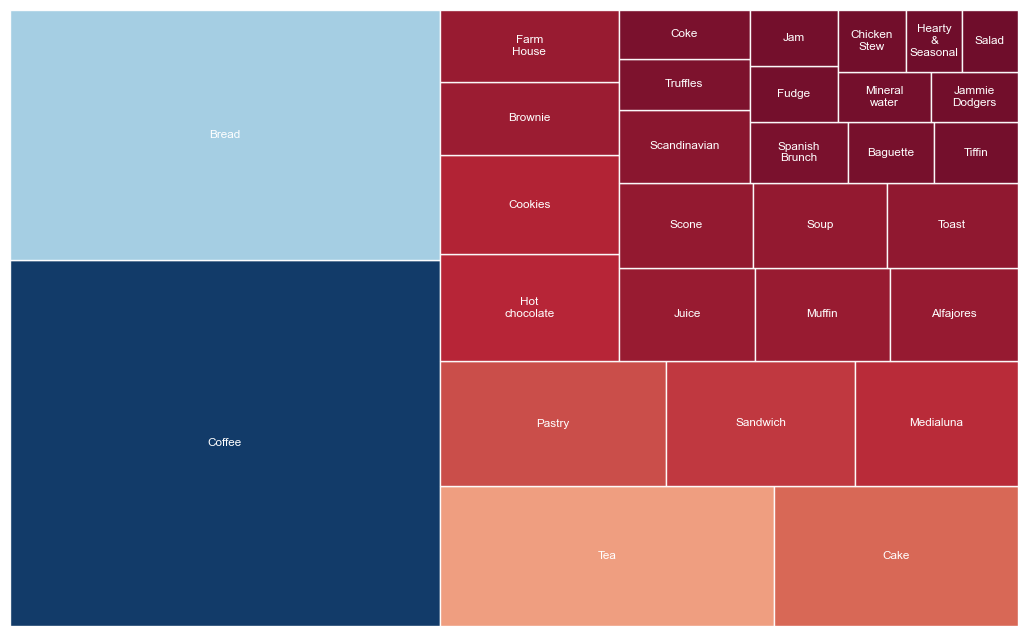

In [78]:
import matplotlib.cm as cm
def split_label(label, max_words=1):
    words = label.split()
    return '\n'.join([' '.join(words[i:i + max_words]) for i in range(0, len(words), max_words)])

# Apply the function to split the labels
item_count_df_30['Item'] = item_count_df_30['Item'].apply(split_label)

# Plotting
fig, ax = plt.subplots(figsize=(13, 8))  # Larger plot

#cmap = matplotlib.cm.coolwarm
cmap = plt.get_cmap("RdBu")
mini = min(item_count_df_30['Count'])
maxi = max(item_count_df_30['Count'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in item_count_df_30['Count']]

squarify.plot(sizes=item_count_df_30['Count'], label=item_count_df_30['Item'],alpha = 0.95, color=colors, text_kwargs={'fontsize': 8.5,'color': 'white'})

plt.axis('off')  # Turn off the axes
plt.show()  

As noted earlier, the most popular items, represented by the largest rectangles, are coffee, bread, tea, cake + items typically regarded as side dishes or supplementary offerings rather than main courses.

## **4. Apriori algorithm - frequent itemsets generation** <a id="Step4"></a>

The *apriori* function implements the Apriori algorithm, which finds frequent itemsets in transactional data. 

In the output:

* **support: the proportion of transactions that contain the itemset**

* **itemsets: the itemsets that meet the support threshold**

Support threshold -> beyond it, items are considered significant, that have meaningful impact on profit

#### a) support threshold 0.05 
We choose only itemsets that appear in more than 5% of transactions ( more than 473 times)

In [85]:
len(transactions) * 0.05

473.25

In [86]:
frequent_itemsets_0_05 = apriori(transactions_df,min_support = 0.05, use_colnames = True, max_len = 3) # only itemsets with up to 3 items
frequent_itemsets_0_05

support         itemsets
0   0.327205          (Bread)
1   0.103856           (Cake)
2   0.478394         (Coffee)
3   0.054411        (Cookies)
4   0.058320  (Hot chocolate)
5   0.061807      (Medialuna)
6   0.086107         (Pastry)
7   0.071844       (Sandwich)
8   0.142631            (Tea)
9   0.090016  (Bread, Coffee)
10  0.054728   (Coffee, Cake)

In [87]:
frequent_itemsets_0_05['length'] = frequent_itemsets_0_05['itemsets'].apply(lambda x: len(x))

In [88]:
#frequent_itemsets_0_05.sort_values('support', ascending=False)

In [89]:
frequent_itemsets_0_05[frequent_itemsets_0_05['length']== 1].sort_values('support', ascending=False)

support         itemsets  length
2  0.478394         (Coffee)       1
0  0.327205          (Bread)       1
8  0.142631            (Tea)       1
1  0.103856           (Cake)       1
6  0.086107         (Pastry)       1
7  0.071844       (Sandwich)       1
5  0.061807      (Medialuna)       1
4  0.058320  (Hot chocolate)       1
3  0.054411        (Cookies)       1

In [90]:
frequent_itemsets_0_05[frequent_itemsets_0_05['length']== 2].sort_values('support', ascending=False)

support         itemsets  length
9   0.090016  (Bread, Coffee)       2
10  0.054728   (Coffee, Cake)       2

In [91]:
frequent_itemsets_0_05[frequent_itemsets_0_05['length']== 3].sort_values('support', ascending=False)

Empty DataFrame
Columns: [support, itemsets, length]
Index: []

#### a) support threshold 0.01  
We select only itemsets that appear in more than 1% of transactions ( more than 94 times )

In [93]:
len(transactions) * 0.01

94.65

In [94]:
frequent_itemsets_0_01 = apriori(transactions_df,min_support = 0.01, use_colnames = True, max_len = 3)
#frequent_itemsets_0_01

In [95]:
frequent_itemsets_0_01['length'] = frequent_itemsets_0_01['itemsets'].apply(lambda x: len(x))

In [96]:
frequent_itemsets_0_01.sort_values('support', ascending=False)

support               itemsets  length
6   0.478394               (Coffee)       1
2   0.327205                (Bread)       1
26  0.142631                  (Tea)       1
4   0.103856                 (Cake)       1
34  0.090016        (Bread, Coffee)       2
..       ...                    ...     ...
11  0.010565    (Hearty & Seasonal)       1
20  0.010460                (Salad)       1
30  0.010354     (Alfajores, Bread)       2
58  0.010037  (Cake, Bread, Coffee)       3
60  0.010037    (Tea, Coffee, Cake)       3

[61 rows x 3 columns]

In [97]:
#frequent_itemsets_0_01[frequent_itemsets_0_01['length']== 1].sort_values('support', ascending=False)

In [98]:
#frequent_itemsets_0_01[frequent_itemsets_0_01['length']== 2].sort_values('support', ascending=False)

In [99]:
frequent_itemsets_0_01[frequent_itemsets_0_01['length']== 3].sort_values('support', ascending=False)

support                 itemsets  length
59  0.011199  (Pastry, Bread, Coffee)       3
58  0.010037    (Cake, Bread, Coffee)       3
60  0.010037      (Tea, Coffee, Cake)       3

#### Comparison 

In [101]:
frequent_itemsets_0_05.shape

(11, 3)

In [102]:
frequent_itemsets_0_01.shape

(61, 3)

Frequent itemsets only differ in the number of itemsets. The first one (with support threshold 5%) contains 11 itemsets, another 61 itemsets (50 itemsets more). 

In both: 

- coffee is present in about 48% of the transactions -> nearly half of the transactions includes coffee !!!
- bread appears in about 33% of the transactions
- tea in 14%
- cake in 10%
- coffee and bread in around 9%, while coffee and cake in around 6%

Additionally, in the *frequent_itemsets_0_01* we have also itemsets composed of 3 items. In about 1% of the transactions (Coffee, Bread, Pastry) or (Coffee, Bread, Cake) or (Coffee, Cake, Tea) appear together. 

What is more, coffee is extremely popular. In the *frequent_itemsets_0_01* in itemsets of 2 items, it appears almost everywhere -> coffee is a highly frequent item. 

## **5. Association rules** <a id="Step5"></a>

#### Theory

Association_rules function, from the mlxtend library, generates association rules from the frequent itemsets. It is used to discover interesting relationships between items in large datasets.

Antecedent ⇒ Consequent

      IF  ⇒  THEN 

        X ⇒ Y
        
If a customer buys X, he/she is likely to also buy Y

<u>Key metrics</u>
* **support - how frequently the antecedent and consequent occur together in the dataset**

example: support = 0.02 = 2% -> the combination of itmes in a set appears in 2% of all transactions

* **confidence - how likely you are to buy one item if you have already bought another** 

example: confidence = 0.75 = 75% -> There is a 75% chance that if you bought X, you would buy Y

* **lift - it indicates if one item truly boosts the sale of another**

example lift = 26.8 -> the two items are purchased together almost 27 times more often than expected if they were bought separately

lift > 1 - Y is likely to be bought with X 

lift = 1 - no associations between items 

lift < 1 - Y is unlikely to be bought with X 

High support ensures the rule is relevant, high confidence ensures the rule is reliable, and high lift ensures the rule reveals meaningful and non-random associations.

<u> What we are interested in are high support, confidence, and lift.</u> This indicates frequent, strong, significant associations between items.

#### a) support threshold 0.05 

In [108]:
rules_0_05 = association_rules(frequent_itemsets_0_05, metric='lift', min_threshold = 0.05)
rules_0_05.sort_values(["confidence"], axis = 0, ascending = False)

antecedents consequents  antecedent support  consequent support   support  \
3      (Cake)    (Coffee)            0.103856            0.478394  0.054728   
0     (Bread)    (Coffee)            0.327205            0.478394  0.090016   
1    (Coffee)     (Bread)            0.478394            0.327205  0.090016   
2    (Coffee)      (Cake)            0.478394            0.103856  0.054728   

   confidence      lift  leverage  conviction  zhangs_metric  
3    0.526958  1.101515  0.005044    1.102664       0.102840  
0    0.275105  0.575059 -0.066517    0.719561      -0.523431  
1    0.188163  0.575059 -0.066517    0.828731      -0.586210  
2    0.114399  1.101515  0.005044    1.011905       0.176684

Interpretation of the first rule: 

- 5.47% of transactions include both Cake and Coffee
- 52.70% of transactions with Cake also include Coffee
- The likelihood of Coffee being purchased with Cake is about 1.10 times higher than if they were independent

The rules with positive lift values (Cake → Coffee and Coffee → Cake) suggest a moderate positive association between these items. 

The rules with negative lift values (Bread → Coffee and Coffee → Bread) suggest a weaker or negative association. In other words, the presence of one item actually decreases the likelihood of finding the other item in the same transaction.

#### a) support threshold 0.01  

In [112]:
rules_0_01 = association_rules(frequent_itemsets_0_01, metric='lift', min_threshold = 0.01)
rules_0_01.sort_values(["confidence"], axis = 0, ascending = False)

antecedents       consequents  antecedent support  \
52           (Toast)          (Coffee)            0.033597   
48  (Spanish Brunch)          (Coffee)            0.018172   
36       (Medialuna)          (Coffee)            0.061807   
40          (Pastry)          (Coffee)            0.086107   
2        (Alfajores)          (Coffee)            0.036344   
..               ...               ...                 ...   
60           (Bread)    (Coffee, Cake)            0.327205   
67          (Coffee)   (Pastry, Bread)            0.478394   
49          (Coffee)  (Spanish Brunch)            0.478394   
61          (Coffee)     (Bread, Cake)            0.478394   
72          (Coffee)       (Tea, Cake)            0.478394   

    consequent support   support  confidence      lift  leverage  conviction  \
52            0.478394  0.023666    0.704403  1.472431  0.007593    1.764582   
48            0.478394  0.010882    0.598837  1.251766  0.002189    1.300235   
36            0.478394  0.035182    0.569231  1.189878  0.005614    1.210871   
40            0.478394  0.047544    0.552147  1.154168  0.006351    1.164682   
2             0.478394  0.019651    0.540698  1.130235  0.002264    1.135648   
..                 ...       ...         ...       ...       ...         ...   
60            0.054728  0.010037    0.030675  0.560497 -0.007870    0.975186   
67            0.029160  0.011199    0.023410  0.802807 -0.002751    0.994112   
49            0.018172  0.010882    0.022747  1.251766  0.002189    1.004682   
61            0.023349  0.010037    0.020981  0.898557 -0.001133    0.997581   
72            0.023772  0.010037    0.020981  0.882582 -0.001335    0.997149   

    zhangs_metric  
52       0.332006  
48       0.204851  
36       0.170091  
40       0.146161  
2        0.119574  
..            ...  
60      -0.538209  
67      -0.320149  
49       0.385594  
61      -0.177928  
72      -0.203223  

[74 rows x 10 columns]

The first few rules show positive associations between various antecedents and Coffee. 

When Toast/Spanish Brunch/Medialuna..  is purchased, it’s quite likely that Coffee will be purchased as well. 

## **6. Visualizations** for rules generated with support threshold 0.01 <a id="Step6"></a>

### **Heatmap**

The heatmap will help visualize the strength of associations between antecedents (2 items) and consequents (1 item) based on the lift metric.

lift > 1 -> if item X is bought, item Y too - strong relationship; useful for cross-promotional strategies or bundling products

lift = 1 -> no association; no specific action might be needed

lift < 1 -> if item X is bought, item Y is not - weak relationship; items might not be complementary or could even be less likely to be purchased together, so it is better not to combine them

In [117]:
# https://python-graph-gallery.com/heatmap/

In [118]:
rules_0_01['antecedents length'] = rules_0_01['antecedents'].apply(lambda x: len(x))

In [119]:
rules_0_01['consequents length'] = rules_0_01['consequents'].apply(lambda x: len(x))

In [120]:
#sanity check
#rules_0_01.tail(20)

In [121]:
rules_0_01_filtered = rules_0_01[(rules_0_01['antecedents length'] == 2) & (rules_0_01['consequents length'] == 1) ].reset_index(drop=True)

In [122]:
rules_0_01_filtered

antecedents consequents  antecedent support  consequent support  \
0     (Bread, Cake)    (Coffee)            0.023349            0.478394   
1    (Coffee, Cake)     (Bread)            0.054728            0.327205   
2   (Bread, Coffee)      (Cake)            0.090016            0.103856   
3   (Pastry, Bread)    (Coffee)            0.029160            0.478394   
4  (Pastry, Coffee)     (Bread)            0.047544            0.327205   
5   (Bread, Coffee)    (Pastry)            0.090016            0.086107   
6     (Tea, Coffee)      (Cake)            0.049868            0.103856   
7       (Tea, Cake)    (Coffee)            0.023772            0.478394   
8    (Coffee, Cake)       (Tea)            0.054728            0.142631   

    support  confidence      lift  leverage  conviction  zhangs_metric  \
0  0.010037    0.429864  0.898557 -0.001133    0.914880      -0.103617   
1  0.010037    0.183398  0.560497 -0.007870    0.823895      -0.453411   
2  0.010037    0.111502  1.073621  0.000688    1.008606       0.075356   
3  0.011199    0.384058  0.802807 -0.002751    0.846843      -0.201920   
4  0.011199    0.235556  0.719901 -0.004357    0.880109      -0.290026   
5  0.011199    0.124413  1.444872  0.003448    1.043749       0.338354   
6  0.010037    0.201271  1.937977  0.004858    1.121962       0.509401   
7  0.010037    0.422222  0.882582 -0.001335    0.902779      -0.119934   
8  0.010037    0.183398  1.285822  0.002231    1.049923       0.235157   

   antecedents length  consequents length  
0                   2                   1  
1                   2                   1  
2                   2                   1  
3                   2                   1  
4                   2                   1  
5                   2                   1  
6                   2                   1  
7                   2                   1  
8                   2                   1

In [123]:
rules_0_01_filtered.shape

(9, 12)

In [124]:
heatmap_df = rules_0_01_filtered.pivot(
    index='antecedents',
    columns='consequents',
    values='lift',
)

In [125]:
heatmap_df

consequents       (Coffee)   (Bread)    (Cake)  (Pastry)     (Tea)
antecedents                                                       
(Bread, Cake)     0.898557       NaN       NaN       NaN       NaN
(Coffee, Cake)         NaN  0.560497       NaN       NaN  1.285822
(Bread, Coffee)        NaN       NaN  1.073621  1.444872       NaN
(Pastry, Bread)   0.802807       NaN       NaN       NaN       NaN
(Pastry, Coffee)       NaN  0.719901       NaN       NaN       NaN
(Tea, Coffee)          NaN       NaN  1.937977       NaN       NaN
(Tea, Cake)       0.882582       NaN       NaN       NaN       NaN

In [126]:
heatmap_df.index = heatmap_df.index.map(lambda x: '_'.join(x))
heatmap_df.index.name = None

In [127]:
# for col in heatmap_df.columns:
#     #print(col)
#     print(next(iter(col)) )

In [128]:
heatmap_df.columns = [next(iter(col)) for col in heatmap_df.columns]
heatmap_df.columns 

Index(['Coffee', 'Bread', 'Cake', 'Pastry', 'Tea'], dtype='object')

In [129]:
heatmap_df

Coffee     Bread      Cake    Pastry       Tea
Bread_Cake     0.898557       NaN       NaN       NaN       NaN
Coffee_Cake         NaN  0.560497       NaN       NaN  1.285822
Bread_Coffee        NaN       NaN  1.073621  1.444872       NaN
Pastry_Bread   0.802807       NaN       NaN       NaN       NaN
Pastry_Coffee       NaN  0.719901       NaN       NaN       NaN
Tea_Coffee          NaN       NaN  1.937977       NaN       NaN
Tea_Cake       0.882582       NaN       NaN       NaN       NaN

### Heatmap plot 

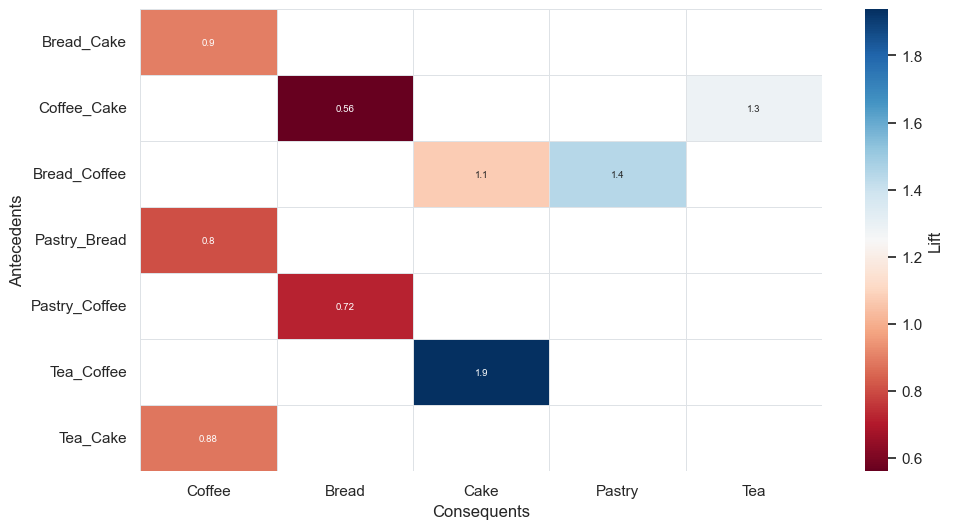

In [131]:
plt.figure(figsize=(11, 6))
ax = sns.heatmap(heatmap_df, annot=True, annot_kws={"size": 7}, cmap='RdBu',linewidths=0.5, linecolor='#dee2e6')

cbar = ax.collections[0].colorbar
cbar.set_label('Lift')

ax.set_frame_on(False)
#ax.set_facecolor('white') 

plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()


value > 1 -> x1 & x2 -> Y, the combination of x1 and x2 increases the likelihood of purchasing y

value < 1 -> x1 & x2 -> Y, the combination of x1 and x2 decreases the likelihood of purchasing y

Strong positive association: Coffee and Tea → Cake - significantly increases

Weak positive association: Coffee and Bread → Cake, Coffee and Bread → Pastry, Coffee and Cake → Tea - slightly increases 

Other are negative associations

### **Scatterplot**

In [134]:
rules_0_01[rules_0_01['antecedents length']==1].sort_values(by = 'confidence', ascending = False).head(50)

antecedents      consequents  antecedent support  consequent support  \
52           (Toast)         (Coffee)            0.033597            0.478394   
48  (Spanish Brunch)         (Coffee)            0.018172            0.478394   
36       (Medialuna)         (Coffee)            0.061807            0.478394   
40          (Pastry)         (Coffee)            0.086107            0.478394   
2        (Alfajores)         (Coffee)            0.036344            0.478394   
35           (Juice)         (Coffee)            0.038563            0.478394   
42        (Sandwich)         (Coffee)            0.071844            0.478394   
25            (Cake)         (Coffee)            0.103856            0.478394   
44           (Scone)         (Coffee)            0.034548            0.478394   
30         (Cookies)         (Coffee)            0.054411            0.478394   
32   (Hot chocolate)         (Coffee)            0.058320            0.478394   
22         (Brownie)         (Coffee)            0.040042            0.478394   
39          (Muffin)         (Coffee)            0.038457            0.478394   
47            (Soup)         (Coffee)            0.034443            0.478394   
50             (Tea)         (Coffee)            0.142631            0.478394   
16          (Pastry)          (Bread)            0.086107            0.327205   
0        (Alfajores)          (Bread)            0.036344            0.327205   
8            (Bread)         (Coffee)            0.327205            0.478394   
14       (Medialuna)          (Bread)            0.061807            0.327205   
4          (Brownie)          (Bread)            0.040042            0.327205   
10         (Cookies)          (Bread)            0.054411            0.327205   
18        (Sandwich)          (Bread)            0.071844            0.327205   
12   (Hot chocolate)          (Bread)            0.058320            0.327205   
29            (Cake)            (Tea)            0.103856            0.142631   
7             (Cake)          (Bread)            0.103856            0.327205   
54        (Sandwich)            (Tea)            0.071844            0.142631   
20             (Tea)          (Bread)            0.142631            0.327205   
26   (Hot chocolate)           (Cake)            0.058320            0.103856   
9           (Coffee)          (Bread)            0.478394            0.327205   
28             (Tea)           (Cake)            0.142631            0.103856   
65          (Pastry)  (Bread, Coffee)            0.086107            0.090016   
24          (Coffee)           (Cake)            0.478394            0.103856   
27            (Cake)  (Hot chocolate)            0.103856            0.058320   
51          (Coffee)            (Tea)            0.478394            0.142631   
55             (Tea)       (Sandwich)            0.142631            0.071844   
41          (Coffee)         (Pastry)            0.478394            0.086107   
59            (Cake)  (Bread, Coffee)            0.103856            0.090016   
73            (Cake)    (Tea, Coffee)            0.103856            0.049868   
17           (Bread)         (Pastry)            0.327205            0.086107   
21           (Bread)            (Tea)            0.327205            0.142631   
43          (Coffee)       (Sandwich)            0.478394            0.071844   
37          (Coffee)      (Medialuna)            0.478394            0.061807   
6            (Bread)           (Cake)            0.327205            0.103856   
71             (Tea)   (Coffee, Cake)            0.142631            0.054728   
33          (Coffee)  (Hot chocolate)            0.478394            0.058320   
31          (Coffee)        (Cookies)            0.478394            0.054411   
19           (Bread)       (Sandwich)            0.327205            0.071844   
15           (Bread)      (Medialuna)            0.327205            0.061807   
53          (Coffee)          (Toast)   

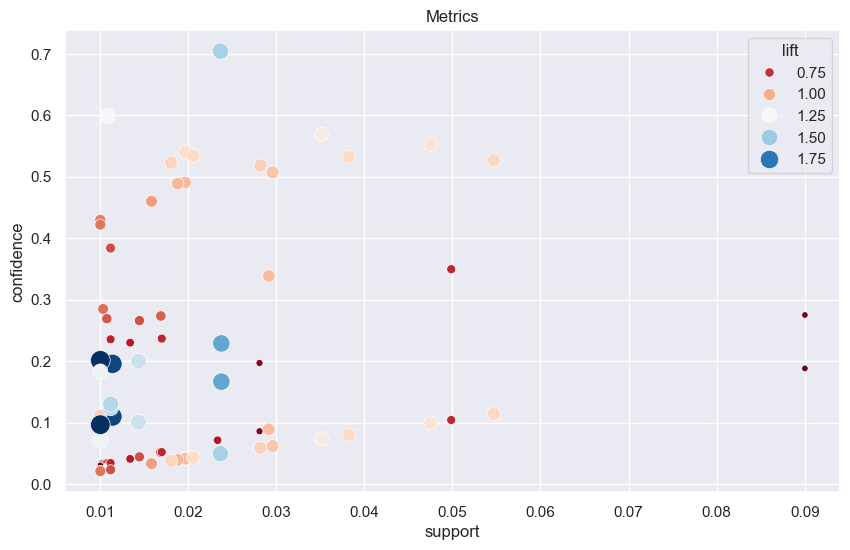

In [135]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", hue="lift", data=rules_0_01, palette='RdBu', sizes=(20, 200))
plt.title('Metrics')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

Overall, the scatter plot shows that **most itemsets have low support and low confidence with varying lift values**. Most bubbles are concentrated in the region with support between 1% and 3%. There are some itemsets with confidence values between 50% and 60%, but these are not significant due to their lift being around 1. This suggests that while these itemsets have decent confidence, they don't provide a stronger association beyond what would be expected by chance.

The majority of itemsets have confidence below 30%, indicating that if I purchase item X, the probability of also purchasing item Y is around 30%. High lift values are observed when confidence is relatively low (around 10-20%) and support is between 1% and 2.5%. This indicates that although these itemsets are infrequent and have lower confidence, the strength of the association is higher when they do occur.


### **Parallel Category Plots**

In [138]:
rules_0_01

antecedents     consequents  antecedent support  consequent support  \
0      (Alfajores)         (Bread)            0.036344            0.327205   
1          (Bread)     (Alfajores)            0.327205            0.036344   
2      (Alfajores)        (Coffee)            0.036344            0.478394   
3         (Coffee)     (Alfajores)            0.478394            0.036344   
4        (Brownie)         (Bread)            0.040042            0.327205   
..             ...             ...                 ...                 ...   
69     (Tea, Cake)        (Coffee)            0.023772            0.478394   
70  (Coffee, Cake)           (Tea)            0.054728            0.142631   
71           (Tea)  (Coffee, Cake)            0.142631            0.054728   
72        (Coffee)     (Tea, Cake)            0.478394            0.023772   
73          (Cake)   (Tea, Coffee)            0.103856            0.049868   

     support  confidence      lift  leverage  conviction  zhangs_metric  \
0   0.010354    0.284884  0.870657 -0.001538    0.940818      -0.133570   
1   0.010354    0.031644  0.870657 -0.001538    0.995145      -0.180870   
2   0.019651    0.540698  1.130235  0.002264    1.135648       0.119574   
3   0.019651    0.041078  1.130235  0.002264    1.004936       0.220910   
4   0.010777    0.269129  0.822508 -0.002326    0.920538      -0.183536   
..       ...         ...       ...       ...         ...            ...   
69  0.010037    0.422222  0.882582 -0.001335    0.902779      -0.119934   
70  0.010037    0.183398  1.285822  0.002231    1.049923       0.235157   
71  0.010037    0.070370  1.285822  0.002231    1.016827       0.259266   
72  0.010037    0.020981  0.882582 -0.001335    0.997149      -0.203223   
73  0.010037    0.096643  1.937977  0.004858    1.051779       0.540090   

    antecedents length  consequents length  
0                    1                   1  
1                    1                   1  
2                    1                   1  
3                    1                   1  
4                    1                   1  
..                 ...                 ...  
69                   2                   1  
70                   2                   1  
71                   1                   2  
72                   1                   2  
73                   1                   2  

[74 rows x 12 columns]

In [139]:
#len(transactions)

In [140]:
b = rules_0_01
b['uni'] = np.nan
b['ant'] = np.nan
b['con'] = np.nan
b['tot'] = 9465
transactions = [ a[1]['Item'].tolist() for a in list(basket.groupby(['Transaction']))]

def trans():
    for t in transactions:
        yield t
    
def ant(x):
    cnt = 0
    for t in trans():
        t = set(t)
        if x.intersection(t) == x:
            cnt = cnt + 1 
    return cnt

bb = b.values.tolist()  

rules_dict = []
for bbb in bb:
    bbb[10] = ant(bbb[0])
    bbb[11] = ant(bbb[1])
    bbb[9] = ant(bbb[0].union(bbb[1]))
    diction = {
        'lhs': tuple(bbb[0]), 
        'rhs': tuple(bbb[1]),
        'count_full': bbb[9],
        'count_lhs': bbb[10],
        'count_rhs': bbb[11],
        'num_transactions': len(transactions)
    }
    rules_dict.append(diction)

In [141]:
rules_dict

[{'lhs': ('Alfajores',),
  'rhs': ('Bread',),
  'count_full': 98,
  'count_lhs': 344,
  'count_rhs': 3097,
  'num_transactions': 9465},
 {'lhs': ('Bread',),
  'rhs': ('Alfajores',),
  'count_full': 98,
  'count_lhs': 3097,
  'count_rhs': 344,
  'num_transactions': 9465},
 {'lhs': ('Alfajores',),
  'rhs': ('Coffee',),
  'count_full': 186,
  'count_lhs': 344,
  'count_rhs': 4528,
  'num_transactions': 9465},
 {'lhs': ('Coffee',),
  'rhs': ('Alfajores',),
  'count_full': 186,
  'count_lhs': 4528,
  'count_rhs': 344,
  'num_transactions': 9465},
 {'lhs': ('Brownie',),
  'rhs': ('Bread',),
  'count_full': 102,
  'count_lhs': 379,
  'count_rhs': 3097,
  'num_transactions': 9465},
 {'lhs': ('Bread',),
  'rhs': ('Brownie',),
  'count_full': 102,
  'count_lhs': 3097,
  'count_rhs': 379,
  'num_transactions': 9465},
 {'lhs': ('Bread',),
  'rhs': ('Cake',),
  'count_full': 221,
  'count_lhs': 3097,
  'count_rhs': 983,
  'num_transactions': 9465},
 {'lhs': ('Cake',),
  'rhs': ('Bread',),
  'count_

In [142]:
rules = []
for rd in rules_dict: 
    rules.append(generate_rule_from_dict(rd))
rules

[{Alfajores} -> {Bread},
 {Bread} -> {Alfajores},
 {Alfajores} -> {Coffee},
 {Coffee} -> {Alfajores},
 {Brownie} -> {Bread},
 {Bread} -> {Brownie},
 {Bread} -> {Cake},
 {Cake} -> {Bread},
 {Bread} -> {Coffee},
 {Coffee} -> {Bread},
 {Cookies} -> {Bread},
 {Bread} -> {Cookies},
 {Hot chocolate} -> {Bread},
 {Bread} -> {Hot chocolate},
 {Medialuna} -> {Bread},
 {Bread} -> {Medialuna},
 {Pastry} -> {Bread},
 {Bread} -> {Pastry},
 {Sandwich} -> {Bread},
 {Bread} -> {Sandwich},
 {Tea} -> {Bread},
 {Bread} -> {Tea},
 {Brownie} -> {Coffee},
 {Coffee} -> {Brownie},
 {Coffee} -> {Cake},
 {Cake} -> {Coffee},
 {Hot chocolate} -> {Cake},
 {Cake} -> {Hot chocolate},
 {Tea} -> {Cake},
 {Cake} -> {Tea},
 {Cookies} -> {Coffee},
 {Coffee} -> {Cookies},
 {Hot chocolate} -> {Coffee},
 {Coffee} -> {Hot chocolate},
 {Coffee} -> {Juice},
 {Juice} -> {Coffee},
 {Medialuna} -> {Coffee},
 {Coffee} -> {Medialuna},
 {Coffee} -> {Muffin},
 {Muffin} -> {Coffee},
 {Pastry} -> {Coffee},
 {Coffee} -> {Pastry},
 {Sand

In [143]:
#type(rules[0])
# print(dir(rules[0]))

In [144]:
# Verification 
# bread_rules = [
#     rule for rule in rules
#     if "Bread" in rule.lhs or "Bread" in rule.rhs
# ]

# for rule in bread_rules:
#     print(rule)

In [145]:
# medialuna_rules = [
#     rule for rule in rules
#     if "Medialuna" in rule.lhs or "Medialuna" in rule.rhs
# ]

# for rule in medialuna_rules:
#     print(rule)

### Way 1

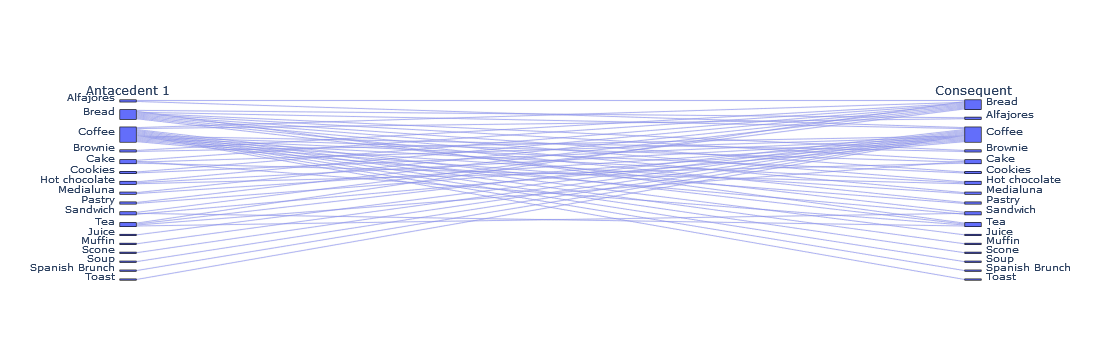

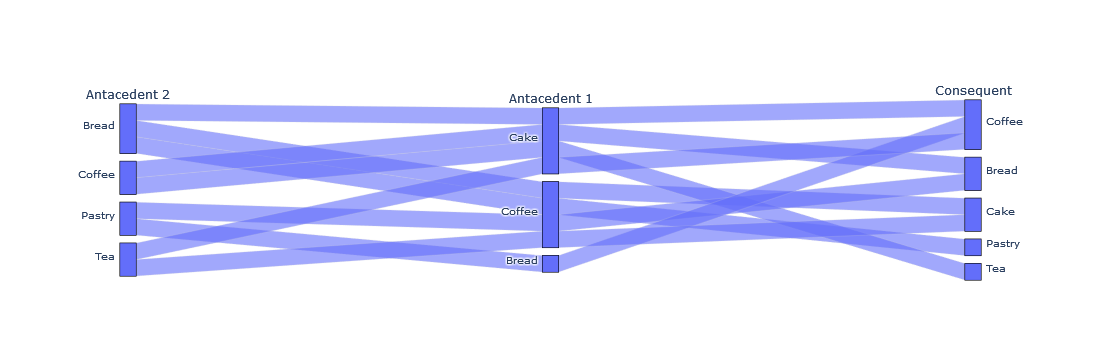

In [147]:
PyARMViz.generate_parallel_category_plot(rules)

First plot
1. The plot features two vertical axes. The left axis represents Antecedent 1, and the right axis represents the Consequent.
2. Each axis is segmented into categories. The width of the rectangular marker next to each category's name indicates the number of rules associated with that category. A broader marker signifies a higher count of rules originating from or leading to that category.
3. The most frequent Antecedent 1 is "coffee" (count = 16), followed by "bread" (count = 10), and "cake" and "tea" (both with counts = 4). The Consequent axis mirrors this distribution, indicating that "coffee" is also the most common consequent.
4. Each line represents an individual association rule. The uniform thickness of the lines and the hover information (count = 1) suggest that each association occurs exactly once, with no variation in frequency.
5. Example:
   
**Antecedent 1 (Coffee) → Consequent (Brownie) 
If a customer buys coffee, they are likely to buy a brownie.**

Second plot - multi-step purchasing behavior
1. This plot introduces an additional layer. It has three vertical axes: Antecedent 2 on the left, Antecedent 1 in the center, and the Consequent on the right.
2. Similar to the first plot, categories are represented with rectangular markers, with width indicating rule frequency.
3. The most common Antecedent 2 is "coffee" (count = 6), the most frequent Antecedent 1 is "cake" (count = 3), and the most common Consequent is "coffee" again (count = 3).
4. As with the first plot, each line represents a single rule with a count of 1, indicated by the hover information and consistent line thickness.
5. Example:

**Antecedent 2 (Cake) → Antecedent 1 (Tea) → Consequent (Coffee)
Customers who first select "cake" tend to also choose "tea," and then they are likely to purchase "coffee" as well.**

### Way 2

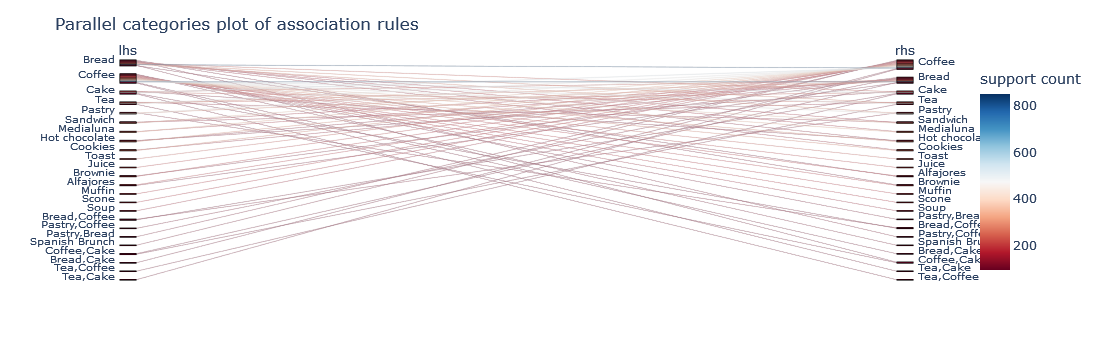

In [151]:
rules_df = pd.DataFrame(rules_dict)

rules_df = rules_df.sort_values(by='count_full', ascending=False)
import plotly.express as px

# Create the parallel categories plot
fig = px.parallel_categories(
    rules_df,
    dimensions=['lhs', 'rhs'],
    color='count_full',  # You can color by 'support', 'confidence', 'lift', etc.
    color_continuous_scale=px.colors.sequential.RdBu
)

fig.update_layout(
    title='Parallel categories plot of association rules',
    coloraxis_colorbar=dict(
        title="support count"
    )
)

fig.show()

In this plot, blue lines represent rules with high support, indicating they occur most frequently in the dataset. Red lines, on the other hand, represent rules with lower support, meaning they are less common. **The majority of the rules are depicted by red lines, suggesting that most of the associations in this dataset have low support and are not frequent.**

Unlike the previous plot, this one also organizes categories on both axes, from the most frequent to the least frequent. This means that by simply glancing at the plot, we can quickly identify the most common categories in a dataset. Considering our dataset **Coffee, Bread, Cake, and Tea are the most frequent items appearing on both the left-hand side (LHS) and the right-hand side (RHS) of the rules.**

<div class="alert alert-block alert-danger"> Coffee is overly dominant in the dataset, it might overshadow other potentially interesting patterns or associations -> removing it could help reveal less obvious relationships between other items,</div>

### **Network graph**

In [155]:
PyARMViz.generate_rule_graph_plotly(rules)

## **7. Final conclusions and recommendations** <a id="Step7"></a>

#### Rules

In [158]:
rules_0_05.sort_values(by = 'confidence', ascending = False)

antecedents consequents  antecedent support  consequent support   support  \
3      (Cake)    (Coffee)            0.103856            0.478394  0.054728   
0     (Bread)    (Coffee)            0.327205            0.478394  0.090016   
1    (Coffee)     (Bread)            0.478394            0.327205  0.090016   
2    (Coffee)      (Cake)            0.478394            0.103856  0.054728   

   confidence      lift  leverage  conviction  zhangs_metric  
3    0.526958  1.101515  0.005044    1.102664       0.102840  
0    0.275105  0.575059 -0.066517    0.719561      -0.523431  
1    0.188163  0.575059 -0.066517    0.828731      -0.586210  
2    0.114399  1.101515  0.005044    1.011905       0.176684

In [159]:
rules_0_01[(rules_0_01['antecedents length']==1) & (rules_0_01['lift'] > 1)].sort_values(by = 'confidence', ascending = False).head(50)

antecedents       consequents  antecedent support  \
52           (Toast)          (Coffee)            0.033597   
48  (Spanish Brunch)          (Coffee)            0.018172   
36       (Medialuna)          (Coffee)            0.061807   
40          (Pastry)          (Coffee)            0.086107   
2        (Alfajores)          (Coffee)            0.036344   
35           (Juice)          (Coffee)            0.038563   
42        (Sandwich)          (Coffee)            0.071844   
25            (Cake)          (Coffee)            0.103856   
44           (Scone)          (Coffee)            0.034548   
30         (Cookies)          (Coffee)            0.054411   
32   (Hot chocolate)          (Coffee)            0.058320   
22         (Brownie)          (Coffee)            0.040042   
39          (Muffin)          (Coffee)            0.038457   
16          (Pastry)           (Bread)            0.086107   
29            (Cake)             (Tea)            0.103856   
54        (Sandwich)             (Tea)            0.071844   
26   (Hot chocolate)            (Cake)            0.058320   
28             (Tea)            (Cake)            0.142631   
65          (Pastry)   (Bread, Coffee)            0.086107   
24          (Coffee)            (Cake)            0.478394   
27            (Cake)   (Hot chocolate)            0.103856   
55             (Tea)        (Sandwich)            0.142631   
41          (Coffee)          (Pastry)            0.478394   
59            (Cake)   (Bread, Coffee)            0.103856   
73            (Cake)     (Tea, Coffee)            0.103856   
17           (Bread)          (Pastry)            0.327205   
43          (Coffee)        (Sandwich)            0.478394   
37          (Coffee)       (Medialuna)            0.478394   
71             (Tea)    (Coffee, Cake)            0.142631   
33          (Coffee)   (Hot chocolate)            0.478394   
31          (Coffee)         (Cookies)            0.478394   
53          (Coffee)           (Toast)            0.478394   
34          (Coffee)           (Juice)            0.478394   
3           (Coffee)       (Alfajores)            0.478394   
23          (Coffee)         (Brownie)            0.478394   
38          (Coffee)          (Muffin)            0.478394   
45          (Coffee)           (Scone)            0.478394   
49          (Coffee)  (Spanish Brunch)            0.478394   

    consequent support   support  confidence      lift  leverage  conviction  \
52            0.478394  0.023666    0.704403  1.472431  0.007593    1.764582   
48            0.478394  0.010882    0.598837  1.251766  0.002189    1.300235   
36            0.478394  0.035182    0.569231  1.189878  0.005614    1.210871   
40            0.478394  0.047544    0.552147  1.154168  0.006351    1.164682   
2             0.478394  0.019651    0.540698  1.130235  0.002264    1.135648   
35            0.478394  0.020602    0.534247  1.116750  0.002154    1.119919   
42            0.478394  0.038246    0.532353  1.112792  0.003877    1.115384   
25            0.478394  0.054728    0.526958  1.101515  0.005044    1.102664   
44            0.478394  0.018067    0.522936  1.093107  0.001539    1.093366   
30            0.478394  0.028209    0.518447  1.083723  0.002179    1.083174   
32            0.478394  0.029583    0.507246  1.060311  0.001683    1.058553   
22            0.478394  0.019651    0.490765  1.025860  0.000495    1.024293   
39            0.478394  0.018806    0.489011  1.022193  0.000408    1.020777   
16            0.327205  0.029160    0.338650  1.034977  0.000985    1.017305   
29            0.142631  0.023772    0.228891  1.604781  0.008959    1.111865   
54            0.142631  0.014369    0.200000  1.402222  0.004122    1.071712   
26            0.103856  0.011410    0.195652  1.883874  0.005354    1.114125   
28            0.103856  0.023772    0.166667  1.604781  0.008959    1.075372   
65            0.090016  0.011199    0.130061  1.444872  0.003448    1.

In [160]:
rules_0_01[(rules_0_01['antecedents length']==2)& (rules_0_01['lift'] > 1)].sort_values(by = 'confidence', ascending = False).head(50)

antecedents consequents  antecedent support  consequent support  \
68    (Tea, Coffee)      (Cake)            0.049868            0.103856   
70   (Coffee, Cake)       (Tea)            0.054728            0.142631   
64  (Bread, Coffee)    (Pastry)            0.090016            0.086107   
58  (Bread, Coffee)      (Cake)            0.090016            0.103856   

     support  confidence      lift  leverage  conviction  zhangs_metric  \
68  0.010037    0.201271  1.937977  0.004858    1.121962       0.509401   
70  0.010037    0.183398  1.285822  0.002231    1.049923       0.235157   
64  0.011199    0.124413  1.444872  0.003448    1.043749       0.338354   
58  0.010037    0.111502  1.073621  0.000688    1.008606       0.075356   

    antecedents length  consequents length  uni  ant  con   tot  
68                   2                   1  NaN  NaN  NaN  9465  
70                   2                   1  NaN  NaN  NaN  9465  
64                   2                   1  NaN  NaN  NaN  9465  
58                   2                   1  NaN  NaN  NaN  9465

Marketing strategies

#### 1. **Toast -> Coffee (70% chance of buying Coffee)**

*“Toast your day with Coffee – your perfect breakfast duo”*

Promotion:
- bundle offer: Toast + Coffee at a special combo price, e.g., “Grab toast and get coffee at 20% off.”
- visual merchandising: Use signage showing steaming coffee and fresh toast together, emphasizing the morning rush appeal.
- digital marketing: Promote on social media with a “Start Your Day Right” theme, featuring happy customers enjoying their morning toast and coffee.

#### 2. **Spanish Brunch -> Coffee (60% chance of buying Coffee)**

*“Savor the flavor: Spanish brunch & a perfect coffee”*

Promotion:
- special brunch days: Promote certain days as “Brunch Days” with special pricing or a small added incentive, like a free refill or mini dessert.
- themed days: Highlight cultural themes, like “Spanish Sunday Brunch,” to attract brunch enthusiasts.

#### 3. **Sweet Pastry (like Medialuna, Alfajores, Cake, Cookies) -> Coffee (more than 50% chance of buying coffee)**

*“Sweet moments deserve coffee”*

Promotion:
- coffee & sweet treat special: Offer a combo price, like “Add any sweet treat to your coffee for a discount.”
- happy hour: Introduce a coffee and sweet combo deal during afternoon hours to capture the post-lunch crowd.
- social media campaign: Run a “Sweet pairing of the day” where you feature a different pastry and coffee combo, encouraging customers to try new things.

#### 4. **Juice / Hot chocolate  -> Coffee ( 53% / 51% chance of buying coffee )**

*“Juice for you, coffee for me – the duo delight!”*

Promotion:
- couple/ friends combo: Special pricing when purchased together.
- engage through special events: “Bring a Friend” days or themed offers that cater to social gatherings, with extra incentives like a free mini treat when bought in pairs.

#### 5. **Coffee + Tea -> Cake (20% Confidence) | Coffee + Cake -> Tea (18% Confidence)**

*“Cake completes the sip: coffee, tea and something sweet”*

Promotion:
- complementary add-ons: Suggest cake when coffee and tea are ordered together. Offer small discounts for adding cake.
- tea time special: Promote a “Tea Time Special” with coffee, tea, and a slice of cake for a combined price, ideal for afternoon breaks.
- tabletop suggestions: Use tabletop displays or digital menu boards to suggest these add-ons with prompts like, “Enjoy with a slice of cake” when ordering coffee and tea.

#### **General marketing tactics across all combos** 
1. Create a <u>loyalty program</u> that rewards customers for frequently purchasing these pairs. For example, after purchasing a combo five times, they get the next coffee or treat free.
2. Feature <u>customer testimonials, photos, or quotes on social media</u> of people enjoying these pairings, highlighting the social aspect of dining at your bakery.
3. Tailor these pairings to <u>seasonal themes</u>, like autumn flavors for pastries or cozy hot chocolate in winter, making the offers feel timely and relevant.
4. <u>Train staff</u> to suggest these pairings based on the initial order, guiding customers toward these combos in a natural, friendly way.

#### **Final thoughts** 

**People love buying coffee**, it is a key driver of complementary sales. Customers frequently pair coffee with other items, such as pastries, cakes, or light meals like toast or a Spanish brunch. While this behavior is not new, it serves as a powerful validation of the concept that coffee often acts as an anchor product, encouraging additional purchases. By tapping into this insight, businesses can strategically boost transaction volume and attract a wider customer base.

Implementing this knowledge through targeted promotions—like discounts on pairings, special deals on certain days, or curated combo offers—can significantly enhance profitability. It is essential to continuously monitor how these strategies impact overall sales and profit margins to refine and optimize your approach further.

This tactic not only appeals to solo visitors but also creates a welcoming environment for various social scenarios—whether it is a casual meet-up with friends, a date, family outings, or even business conversations. It positions your establishment as a versatile space that caters to all.

In our analysis, while many of the association rules identified were similar, the insights were still valuable. Even though supports were relatively low, confidence and lift could be higher, the results reaffirmed expected patterns.